# Feature Emgineering - Evaluation of Missing Data

După cum am spus la început, în cadrul unui set de date real o să fie extrem de multe date care lipsesc, iar un algoritm de Machine Learning nu poate să funcționeze dacă are astfel de date lipsă. Trebuie să rezolvăm problema aceasta. Pentru partea de început o să aruncăm o privire peste datele care lipsesc și procentajele de date lipsă pentru coloane

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Înainte de a ne putea gândi la modalitatea de a înclocui date lipsă cu anumite valori, prima dată trebuie să vedem ce tip de date sunt prezente în coloanele din setul de date cu care lucrăm. Trebuie să înțelegem ce date sunt prezente în cadrul acestui set de date. De cele mai multe ori ar trebui să avem o descriere a fiecărui feature dintr-un data set într-un fișier separat. Din fericire avem la dispoziție acest fișier pentru setul de date cu care lucărm, dar acest fișier este de tip txt, trebuie deschis cu cod de python. Dacă nu avem acest fișier, atunci trebuie să ne dăm seama ce anume reprezintă coloanele (features) din acest set de date.

In [5]:
with open('../data/DATA/Ames_Housing_Feature_Description.txt', 'r') as feature_description_file:
    print(feature_description_file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

În cadrul acelui fișier avem descrierea fiecărui feature și ce anume reprezintă datele respective. Fișierul respectiv se poate deschide și într-un editor normal de text pentru a citi informațiile din el.

În continuare o să lucrăm cu fișierul pe care l-am creat în partea precedentă, acela unde am elimiat ouliers din setul de date

In [9]:
df = pd.read_csv('../data/DATA/Ames_Housing_Data_outliers_removed.csv').drop('Unnamed: 0', axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [11]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Coloana de PID este doar un alt index, se poate face drop la coloana respectivă din moment ce avem și index-ul din Pandas.

In [12]:
df = df.drop('PID', axis=1)

In [13]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Să trecem acuma la partea de vizualizare de date lipsă. Pentru a vedea dacă există anumite date lipsă în cadrul unui DataFrame o să utilizăm metoda 'isnull()'

In [14]:
df.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2923,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2924,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


Metoda respectivă returnează o mapare a DataFrame-ului unde True înseamnă că avem o valoare nulă, iar False înseamnă că există o valoare în acea poziție. Pentru a verifica numărul de valori care lispesc din fiecare coloană se pot însuma valorile de True din fiecare coloană. Pentru asta o să trebuiască doar să apelăm metoda .sum() după metoda .isnull()

In [18]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

Valorile respective se pot și sorta pentru a vedea care dintre coloanele respective au cele mai multe valori lipsă

In [22]:
df.isnull().sum().sort_values(ascending=False).head(27)

Pool QC           2915
Misc Feature      2822
Alley             2729
Fence             2355
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Mas Vnr Type        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Bsmt Unf SF          1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
BsmtFin SF 1         1
Garage Area          1
BsmtFin SF 2         1
dtype: int64

Mai sus avem un număr de valori care lipsesc dintr-o anumită coloană. De foarte multe ori ar fi util să avem un procentaj al valorilor lipsă, deoarece așa ne-am putea da seama mai bine dacă lipsesc prea multe valori dintr-o coloană sau nu. Pentru asta putem utiliza regula de 3 simplă

In [27]:
(100 * df.isnull().sum() / len(df)).sort_values(ascending=False).head(27)

Pool QC           99.590024
Misc Feature      96.412709
Alley             93.235395
Fence             80.457807
Fireplace Qu      48.582166
Lot Frontage      16.740690
Garage Cond        5.432183
Garage Finish      5.432183
Garage Yr Blt      5.432183
Garage Qual        5.432183
Garage Type        5.363854
Bsmt Exposure      2.835668
BsmtFin Type 2     2.767339
Bsmt Cond          2.733174
Bsmt Qual          2.733174
BsmtFin Type 1     2.733174
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Bsmt Unf SF        0.034165
Garage Cars        0.034165
Electrical         0.034165
Total Bsmt SF      0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
dtype: float64

Din rezultatul de mai sus se poate observa faptul că există anumite coloane care au un procentaj mic de valori lipsă și altele care au un procentaj extrem de mare. De exemplu pentru 'Pool QC' lipsește un procentaj de 99.59% din date. Asta poate avea două cauze: fie nu au fost colectate date pentru acest feature, fie unde este valoarea NaN acolo defapt înseamnă că nu există piscină și ar trebuie să înlocuim NaN cu o altă valoare (0 de exemplu). Trebuie să citim documentația din acel fișier să vedem ce anume reprezintă fiecare coloană și datele din coloanele respective.

Ce se mai poate face în acest moment este să extragem acele date de mai sus într-un Series și să creem un plot pentru acestea.

In [28]:
percentage_missing = (100 * df.isnull().sum() / len(df)).sort_values(ascending=False).head(27)

<AxesSubplot:>

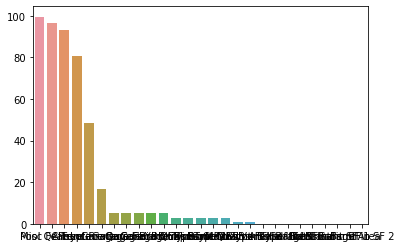

In [29]:
sns.barplot(x=percentage_missing.index, y=percentage_missing)

Problema la acest grafic este faptul că nu se înțeleg label-urile de la x. Aici se poate rezolva destul de ușor această problemă cu matplotlib prin rotirea la 90 de grade a acelor labels

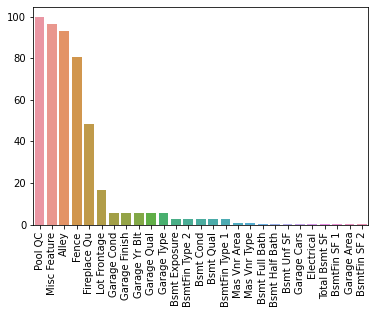

In [31]:
sns.barplot(x=percentage_missing.index, y=percentage_missing)
plt.xticks(rotation=90);

## Recapitulare

În cadrul acestui tutorial am învățat următoarele lucrui:

    1. Cum să verificăm dacă sunt valori lipsă în cadrul unui DatFrame

        df.isnull()

    2. Cum să calculăm numărul total de valori lispă pentru fiecare feature dintr-un DataFrame

        df.isnull().sum()

        100 * df.isnull().sum() / len(df) # pentru procentaj

    3. Datele returnate se pot sorta și afișa într-un plot

        percentage_missing = df.isnull().sum().sort_values(ascending=False)

        percentage_missing[percentage_missing > 0]

        sns.barplot(x=percentage_missing.index, percentage_missing)

        plt.xticks(rotation=90);
